# Support Vector Machine Assignment

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [77]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
print(data.head())
print(data.info())
print(data.shape[0])

   GRE  TOEFL  SchoolRank  SOP  LOR   GPA  Research  Admitted
0  337    118           4  4.5  4.5  9.65         1         1
1  324    107           4  4.0  4.5  8.87         1         1
2  316    104           3  3.0  3.5  8.00         1         1
3  322    110           3  3.5  2.5  8.67         1         1
4  314    103           2  2.0  3.0  8.21         0         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRE         400 non-null    int64  
 1   TOEFL       400 non-null    int64  
 2   SchoolRank  400 non-null    int64  
 3   SOP         400 non-null    float64
 4   LOR         400 non-null    float64
 5   GPA         400 non-null    float64
 6   Research    400 non-null    int64  
 7   Admitted    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB
None
400


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [78]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [79]:
group = data.groupby(by='Admitted').mean()
group

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [80]:
admit_percen = ((data['Admitted'] == 1).sum() / (data.shape[0]))*100
not_admit_percen = ((data['Admitted'] == 0).sum() / (data.shape[0]))*100

print('Percent admitted: ' ,admit_percen,'%')
print('Percent not admitted: ' ,not_admit_percen, '%')

Percent admitted:  61.75000000000001 %
Percent not admitted:  38.25 %


### What percent of students with research experience were admitted?

In [81]:
resea_ad = len(data[(data['Admitted'] == 1) & (data['Research'] == 1)])
resea_to = len(data[data['Research'] == 1])

print('Percent with experience admitted: ', (resea_ad/resea_to)*100,'%')

Percent with experience admitted:  82.64840182648402 %


### What percent of students admitted had research experience?

In [82]:
print('Percent admitted with reserach: ', (resea_ad / (data['Admitted'] == 1).sum())*100,'%')

Percent admitted with reserach:  73.27935222672065 %


### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

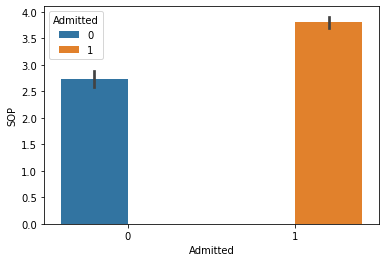

In [83]:
chart = sns.barplot(x=data['Admitted'], y=data['SOP'], hue='Admitted', data=data)

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

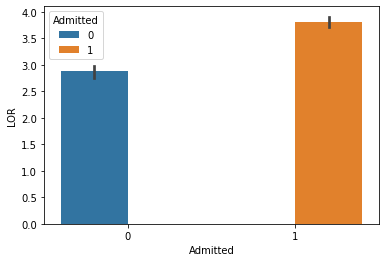

In [84]:
chart1 = sns.barplot(x=data['Admitted'], y=data['LOR'], hue='Admitted', data=data)

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

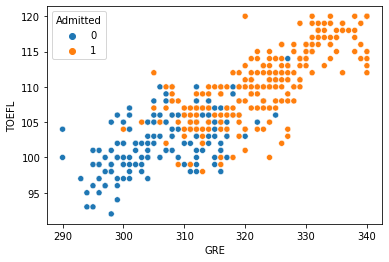

In [85]:
sns.scatterplot(x=data['GRE'], y=data['TOEFL'], hue='Admitted', data=data)

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

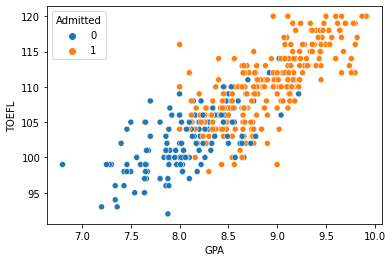

In [86]:
sns.scatterplot(x=data['GPA'], y=data['TOEFL'], hue='Admitted', data=data)

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

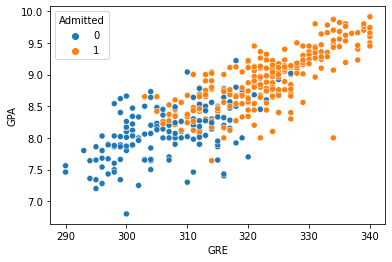

In [87]:
sns.scatterplot(x=data['GRE'], y=data['GPA'], hue='Admitted', data=data)

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [88]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Admitted')
y = data['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 320
The number of observations in test set is 80


### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [89]:
from sklearn.svm import SVC

vectored = SVC(kernel='linear')
vectored.fit(X_train, y_train)
print('SVM Train Score: ', vectored.score(X_train, y_train))
print('SVM Test Score: ', vectored.score(X_test, y_test))

SVM Train Score:  0.871875
SVM Test Score:  0.825


### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [90]:
from sklearn.metrics import classification_report

y_pred_train = vectored.predict(X_train)
y_pred_test = vectored.predict(X_test)

train_repo = classification_report(y_train, y_pred_train)
test_repo = classification_report(y_test, y_pred_test)
print(train_repo)
print(test_repo)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       123
           1       0.89      0.91      0.90       197

    accuracy                           0.87       320
   macro avg       0.87      0.86      0.86       320
weighted avg       0.87      0.87      0.87       320

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.91      0.80      0.85        50

    accuracy                           0.82        80
   macro avg       0.82      0.83      0.82        80
weighted avg       0.84      0.82      0.83        80

